In [1]:
import os

In [2]:
os.chdir('drive/My Drive/')

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('E-Commerce Reviews.csv')

In [4]:
data = data.drop('Unnamed: 0',axis =1)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
print(data.shape)
data.dropna(axis=0, how ='any',inplace = True)

(23486, 10)


In [6]:
dict_division  ={'General':[0]*6,'General Petite':[0]*6, 'Initmates':[0]*6}

for div_name, rate in zip(data['Division Name'], data['Rating']):
    dict_division[div_name][rate] +=1
for key in dict_division.keys():
    dict_division[key] = np.array(dict_division[key])
    dict_division[key] = (dict_division[key]/np.sum(dict_division[key]))*100

In [7]:
import plotly.graph_objects as go

Division_name =['General', 'General Petite', 'Initmates']
figure = []
for i in range(1,6):
    y = [dict_division[key][i] for key in dict_division.keys()]
    x = Division_name
    figure.append(go.Bar(name='Rating {}'.format(i), x=Division_name, y=y))
fig = go.Figure(data = figure)
fig.update_layout(barmode='group')
fig.update_layout(template= 'plotly_white')
fig.update_layout(title='Rating distribution across the Division Name')
fig.show()

From the above distibution it's look like that rating distribution doesn’t have strong influence of Division Name, It is following the same

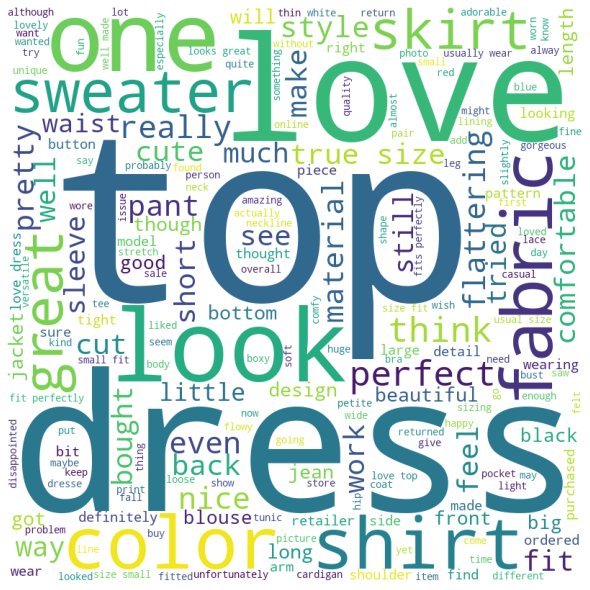

In [8]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = '' 
stopwords = set(STOPWORDS)

for val in data['Review Text']: 
    val = str(val)  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 



*   The presence of word like (love, great,pretty) word cloud is justifying our above rating distribution where more than 50% of the reviews got 5 rating
*   Most highlighted words are about the dresses




# Why are customers giving lower rating?

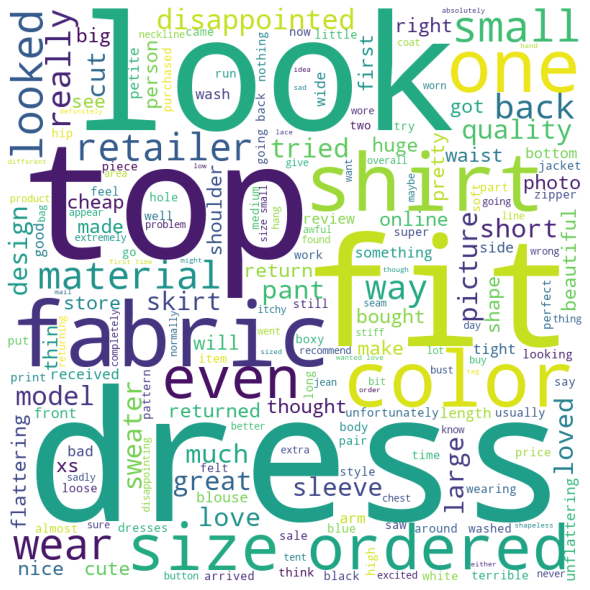

In [9]:
# Looking at the cause of low rating
comment_words = '' 
for rating, val in zip(data['Rating'],data['Review Text']) : 
    if rating!=1:
        continue

    val = str(val)  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


**Looking at the above word cloud, it seems that the customer are having issues regarding the fabric, material, fit, look**

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
        """
        correct the spelling of the word.
        """
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower()

    def remove_numbers(self,text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
        """
        take string input and clean string without punctuations.
        use regex to remove the punctuations.
        """
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        """
        take string input and clean string without tags.
        use regex to remove the html tags.
        """
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
        """
        take string input and return list of sentences.
        use nltk.sent_tokenize() to split the sentences.
        """
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        """
        :param text:
        :return: list of words
        """
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
        """
        :param word_tokens:
        :return: list of words
        """
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)
    def flatten(self, text):
        return " ".join(text)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        sentences = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            sentences.append(clean_text)
        return self.flatten(sentences)

In [12]:
preproc = Preprocess()

In [13]:
sentences = [preproc.preprocess(sent) for sent in data['Review Text']]

In [14]:
sentences[0]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium wa ok overall top half wa comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw wa net layer sewn directly zipper c'

In [15]:
rating = data['Rating']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Using tf-idf for word represntation

In [17]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(sentences)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = np.array(dense.tolist(), dtype =np.float16)

In [18]:
denselist.shape

(19662, 1000)

## Fitting a simple logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(denselist, np.array(rating), test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(solver = 'liblinear',penalty='l1')

In [22]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.6404780066107297

## Fitting a decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.4978387998982965

## Fitting a random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6071700991609459

## Using RNN model

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [33]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(RNN,self).__init__()
        
        self.embedding = nn.Embedding(input_dim,embedding_dim)
    
        self.rnn = nn.GRU(embedding_dim, hidden_dim,
                            dropout=dropout,batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # self.dropout = nn.Dropout(dropout)
        
   
                
    def forward(self, x):
        #x [sent length , batch size].T
        embedded = self.embedding(x) #[batch size,sentence len,embedding dim]
       
        
        _, hidden = self.rnn(embedded)
        #[numberlayers*num of dir,batch size,hid dim]
        #[f0,b0,f1,b1,.......fn,bn]
        return F.softmax(self.fc(hidden.squeeze(0)), dim =1)

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(4000)

In [36]:
tokenizer.fit_on_texts(sentences)

In [37]:
sentences = tokenizer.texts_to_sequences(sentences)

In [38]:
sentences = pad_sequences(sentences,100)

In [39]:
def get_batch(X, y, batch_size=64):
    index = np.random.permutation(X.shape[0])
    X = X[index]
    y = y[index]
    
    for i in range(0,X.shape[0]-batch_size-1,batch_size):
        
        yield X[i:i+batch_size], y[i:i+batch_size]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(sentences, np.array(rating)-1, test_size=0.2, random_state=42)

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RNN(input_dim = 4000, embedding_dim=128, hidden_dim=128, output_dim=5, n_layers = 1, dropout = 0.2)
model.to(device)
optim_cnn = torch.optim.SGD(model.parameters(),lr =0.006)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1



In [42]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [43]:
from tqdm import tqdm, tqdm_notebook,notebook
N_epoch = 100
early_stopping = EarlyStopping(patience=7, verbose=True)

for epoch in notebook.tqdm(range(N_epoch),desc = "Epoch"):
    loss_train = 0
    for x,y in notebook.tqdm(get_batch(X_train, y_train),desc ="Batch train progress"):
        
        
        x = torch.from_numpy(x).to(torch.int64).to(device)
        y = torch.from_numpy(y).to(torch.int64).to(device)
        x = model(x)
        x = torch.squeeze(x,0)

        loss_ = F.cross_entropy(x, y)
        optim_cnn.zero_grad()
        loss_.backward()
        optim_cnn.step()
        
        loss_train += loss_.item()
    
    model.eval()
    loss_test = 0
    for x,y in notebook.tqdm(get_batch(X_test, y_test),desc ="Batch test progress"):
        x = torch.from_numpy(x).to(torch.int64).to(device)
        y = torch.from_numpy(y).to(torch.int64).to(device)
        
        x = model(x)
        x = torch.squeeze(x,0)
        
        loss_ = F.cross_entropy(x, y)
        loss_test += loss_.item()
    
    model.train()
    early_stopping(loss_test, model)
    
    print("Epoch {} training loss {:.4f}, test loss {:.4f}".format(epoch+1,loss_train, loss_test))
    if early_stopping.early_stop:
        print("Early stopping")
        break
model.load_state_dict(torch.load('checkpoint.pt'))


Validation loss decreased (inf --> 97.057462).  Saving model ...
Epoch 1 training loss 392.7140, test loss 97.0575



Validation loss decreased (97.057462 --> 95.317895).  Saving model ...
Epoch 2 training loss 386.7801, test loss 95.3179



Validation loss decreased (95.317895 --> 93.059114).  Saving model ...
Epoch 3 training loss 379.1828, test loss 93.0591



Validation loss decreased (93.059114 --> 90.362005).  Saving model ...
Epoch 4 training loss 369.6983, test loss 90.3620



Validation loss decreased (90.362005 --> 87.712171).  Saving model ...
Epoch 5 training loss 359.3721, test loss 87.7122



Validation loss decreased (87.712171 --> 85.619901).  Saving model ...
Epoch 6 training loss 350.5391, test loss 85.6199



Validation loss decreased (85.619901 --> 84.356804).  Saving model ...
Epoch 7 training loss 344.4182, test loss 84.3568



Validation loss decreased (84.356804 --> 83.525698).  Saving model ...
Epoch 8 training loss 340.5791, test loss 83.5257



Validation loss decreased (83.525698 --> 83.005287).  Saving model ...
Epoch 9 training loss 338.1892, test loss 83.0053



Validation loss decreased (83.005287 --> 82.596452).  Saving model ...
Epoch 10 training loss 336.6816, test loss 82.5965



Validation loss decreased (82.596452 --> 82.338503).  Saving model ...
Epoch 11 training loss 335.7215, test loss 82.3385



Validation loss decreased (82.338503 --> 82.232413).  Saving model ...
Epoch 12 training loss 334.8564, test loss 82.2324



Validation loss decreased (82.232413 --> 82.044999).  Saving model ...
Epoch 13 training loss 334.3936, test loss 82.0450



Validation loss decreased (82.044999 --> 81.987344).  Saving model ...
Epoch 14 training loss 334.1275, test loss 81.9873



Validation loss decreased (81.987344 --> 81.875919).  Saving model ...
Epoch 15 training loss 333.6677, test loss 81.8759



Validation loss decreased (81.875919 --> 81.752801).  Saving model ...
Epoch 16 training loss 333.3788, test loss 81.7528



EarlyStopping counter: 1 out of 7
Epoch 17 training loss 333.2339, test loss 81.7679



Validation loss decreased (81.752801 --> 81.741767).  Saving model ...
Epoch 18 training loss 333.0255, test loss 81.7418



Validation loss decreased (81.741767 --> 81.595720).  Saving model ...
Epoch 19 training loss 332.9448, test loss 81.5957



EarlyStopping counter: 1 out of 7
Epoch 20 training loss 332.9310, test loss 81.6032



Validation loss decreased (81.595720 --> 81.546144).  Saving model ...
Epoch 21 training loss 332.7329, test loss 81.5461



Validation loss decreased (81.546144 --> 81.540878).  Saving model ...
Epoch 22 training loss 332.6397, test loss 81.5409



Validation loss decreased (81.540878 --> 81.470352).  Saving model ...
Epoch 23 training loss 332.6007, test loss 81.4704



EarlyStopping counter: 1 out of 7
Epoch 24 training loss 332.3751, test loss 81.5036



EarlyStopping counter: 2 out of 7
Epoch 25 training loss 332.3295, test loss 81.5431



Validation loss decreased (81.470352 --> 81.455931).  Saving model ...
Epoch 26 training loss 332.0907, test loss 81.4559



Validation loss decreased (81.455931 --> 81.423000).  Saving model ...
Epoch 27 training loss 332.1736, test loss 81.4230



EarlyStopping counter: 1 out of 7
Epoch 28 training loss 332.1279, test loss 81.4903



EarlyStopping counter: 2 out of 7
Epoch 29 training loss 332.0368, test loss 81.4241



EarlyStopping counter: 3 out of 7
Epoch 30 training loss 331.9617, test loss 81.4421



Validation loss decreased (81.423000 --> 81.372645).  Saving model ...
Epoch 31 training loss 331.8197, test loss 81.3726



Validation loss decreased (81.372645 --> 81.358108).  Saving model ...
Epoch 32 training loss 331.8288, test loss 81.3581



Validation loss decreased (81.358108 --> 81.293763).  Saving model ...
Epoch 33 training loss 331.7093, test loss 81.2938



EarlyStopping counter: 1 out of 7
Epoch 34 training loss 331.7592, test loss 81.3144



EarlyStopping counter: 2 out of 7
Epoch 35 training loss 331.6249, test loss 81.3275



EarlyStopping counter: 3 out of 7
Epoch 36 training loss 331.6474, test loss 81.3324



EarlyStopping counter: 4 out of 7
Epoch 37 training loss 331.4719, test loss 81.3439



Validation loss decreased (81.293763 --> 81.288849).  Saving model ...
Epoch 38 training loss 331.5673, test loss 81.2888



EarlyStopping counter: 1 out of 7
Epoch 39 training loss 331.5784, test loss 81.3213



EarlyStopping counter: 2 out of 7
Epoch 40 training loss 331.2770, test loss 81.2926



EarlyStopping counter: 3 out of 7
Epoch 41 training loss 331.4433, test loss 81.3124



Validation loss decreased (81.288849 --> 81.278205).  Saving model ...
Epoch 42 training loss 331.2123, test loss 81.2782



Validation loss decreased (81.278205 --> 81.206235).  Saving model ...
Epoch 43 training loss 331.3476, test loss 81.2062



Validation loss decreased (81.206235 --> 81.170079).  Saving model ...
Epoch 44 training loss 331.2036, test loss 81.1701



EarlyStopping counter: 1 out of 7
Epoch 45 training loss 331.1966, test loss 81.2021



EarlyStopping counter: 2 out of 7
Epoch 46 training loss 330.9840, test loss 81.2395



Validation loss decreased (81.170079 --> 81.161518).  Saving model ...
Epoch 47 training loss 331.0708, test loss 81.1615



EarlyStopping counter: 1 out of 7
Epoch 48 training loss 331.0873, test loss 81.1963



EarlyStopping counter: 2 out of 7
Epoch 49 training loss 331.0635, test loss 81.2170



EarlyStopping counter: 3 out of 7
Epoch 50 training loss 330.8965, test loss 81.1979



EarlyStopping counter: 4 out of 7
Epoch 51 training loss 330.9299, test loss 81.1978



EarlyStopping counter: 5 out of 7
Epoch 52 training loss 330.9067, test loss 81.1782



Validation loss decreased (81.161518 --> 81.159058).  Saving model ...
Epoch 53 training loss 330.8336, test loss 81.1591



EarlyStopping counter: 1 out of 7
Epoch 54 training loss 330.8243, test loss 81.2328



EarlyStopping counter: 2 out of 7
Epoch 55 training loss 330.7147, test loss 81.1609



Validation loss decreased (81.159058 --> 81.154985).  Saving model ...
Epoch 56 training loss 330.6443, test loss 81.1550



Validation loss decreased (81.154985 --> 81.099046).  Saving model ...
Epoch 57 training loss 330.5810, test loss 81.0990



Validation loss decreased (81.099046 --> 81.096902).  Saving model ...
Epoch 58 training loss 330.5720, test loss 81.0969



Validation loss decreased (81.096902 --> 81.064240).  Saving model ...
Epoch 59 training loss 330.5025, test loss 81.0642



EarlyStopping counter: 1 out of 7
Epoch 60 training loss 330.5024, test loss 81.0939



Validation loss decreased (81.064240 --> 81.026291).  Saving model ...
Epoch 61 training loss 330.5410, test loss 81.0263



Validation loss decreased (81.026291 --> 81.017050).  Saving model ...
Epoch 62 training loss 330.4049, test loss 81.0171



EarlyStopping counter: 1 out of 7
Epoch 63 training loss 330.2980, test loss 81.0398



EarlyStopping counter: 2 out of 7
Epoch 64 training loss 330.3260, test loss 81.0903



EarlyStopping counter: 3 out of 7
Epoch 65 training loss 330.3160, test loss 81.0839



EarlyStopping counter: 4 out of 7
Epoch 66 training loss 330.1933, test loss 81.0887



EarlyStopping counter: 5 out of 7
Epoch 67 training loss 330.1196, test loss 81.0201



Validation loss decreased (81.017050 --> 81.010909).  Saving model ...
Epoch 68 training loss 330.0024, test loss 81.0109



EarlyStopping counter: 1 out of 7
Epoch 69 training loss 330.0971, test loss 81.0155



EarlyStopping counter: 2 out of 7
Epoch 70 training loss 329.9176, test loss 81.0307



Validation loss decreased (81.010909 --> 81.002099).  Saving model ...
Epoch 71 training loss 329.9673, test loss 81.0021



Validation loss decreased (81.002099 --> 80.926735).  Saving model ...
Epoch 72 training loss 329.9321, test loss 80.9267



EarlyStopping counter: 1 out of 7
Epoch 73 training loss 329.8616, test loss 80.9447



Validation loss decreased (80.926735 --> 80.918065).  Saving model ...
Epoch 74 training loss 329.8150, test loss 80.9181



EarlyStopping counter: 1 out of 7
Epoch 75 training loss 329.8655, test loss 81.0053



EarlyStopping counter: 2 out of 7
Epoch 76 training loss 329.7763, test loss 80.9830



EarlyStopping counter: 3 out of 7
Epoch 77 training loss 329.5772, test loss 80.9727



Validation loss decreased (80.918065 --> 80.916181).  Saving model ...
Epoch 78 training loss 329.6427, test loss 80.9162



EarlyStopping counter: 1 out of 7
Epoch 79 training loss 329.5428, test loss 80.9392



EarlyStopping counter: 2 out of 7
Epoch 80 training loss 329.5914, test loss 81.0237



EarlyStopping counter: 3 out of 7
Epoch 81 training loss 329.4452, test loss 80.9656



Validation loss decreased (80.916181 --> 80.913801).  Saving model ...
Epoch 82 training loss 329.4182, test loss 80.9138



EarlyStopping counter: 1 out of 7
Epoch 83 training loss 329.3930, test loss 80.9157



Validation loss decreased (80.913801 --> 80.872970).  Saving model ...
Epoch 84 training loss 329.3657, test loss 80.8730



EarlyStopping counter: 1 out of 7
Epoch 85 training loss 329.4145, test loss 81.0003



EarlyStopping counter: 2 out of 7
Epoch 86 training loss 329.1967, test loss 80.9626



EarlyStopping counter: 3 out of 7
Epoch 87 training loss 329.2782, test loss 80.9086



EarlyStopping counter: 4 out of 7
Epoch 88 training loss 329.1979, test loss 80.9142



EarlyStopping counter: 5 out of 7
Epoch 89 training loss 329.1129, test loss 80.8835



EarlyStopping counter: 6 out of 7
Epoch 90 training loss 329.0934, test loss 80.9358



Validation loss decreased (80.872970 --> 80.863305).  Saving model ...
Epoch 91 training loss 329.1399, test loss 80.8633



EarlyStopping counter: 1 out of 7
Epoch 92 training loss 328.9594, test loss 80.9323



EarlyStopping counter: 2 out of 7
Epoch 93 training loss 329.0256, test loss 80.9121



EarlyStopping counter: 3 out of 7
Epoch 94 training loss 328.8925, test loss 80.8792



EarlyStopping counter: 4 out of 7
Epoch 95 training loss 328.8997, test loss 80.8947



Validation loss decreased (80.863305 --> 80.814606).  Saving model ...
Epoch 96 training loss 328.8002, test loss 80.8146



EarlyStopping counter: 1 out of 7
Epoch 97 training loss 328.8372, test loss 80.8892



EarlyStopping counter: 2 out of 7
Epoch 98 training loss 328.7857, test loss 80.8313



EarlyStopping counter: 3 out of 7
Epoch 99 training loss 328.7512, test loss 80.8352



Validation loss decreased (80.814606 --> 80.782846).  Saving model ...
Epoch 100 training loss 328.6945, test loss 80.7828



<All keys matched successfully>

In [44]:
def get_accuracy(model,x, y):
    x = torch.from_numpy(x).to(torch.int64).to(device)
    x = model(x)
    
    x = torch.squeeze(x,0)
    y_pred = x.cpu().data.numpy().argmax(axis =1)
    
    return accuracy_score(y_pred, y)


In [45]:
count =0 
acc =0
for x, y in get_batch(X_test, y_test):
    count+=1
    acc +=get_accuracy(model, x, y)

In [46]:
print(acc/(count-1))

0.5869791666666667


Further experimentation can be done to improve the model accuracy by adding more hidden layers, increasing hidden dimension,

Comparing all the above models, i would temporarily go with 'Simple Logistic Regression'

But, if we are willing to increase the complexity of model, I would definitely go with RNN. Though the performance now is a bit lower, still upon adding more hidden layers, we might find out deeper connections/relations in the dataset.